In [24]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

In [25]:
#f = r.TFile("/home/jlab/ExternalDrive/Seagate/Data/new_unpacked/output_40_18433_00055.root")
f = r.TFile("./waveforms.root")
run_num = 18433
subRun_num = "00055"

In [26]:
f.cd("islands")
f.cd("islands/islands")

True

In [27]:
f.ls()

TFile**		./waveforms.root	
 TFile*		./waveforms.root	
  TDirectoryFile*		islands	islands (CaloIslandAnalyzer) folder
   TDirectoryFile*		islands	islands
    KEY: TTree	islandTree;6	Tree of xtal traces
    KEY: TTree	islandTree;5	Tree of xtal traces
   KEY: TDirectoryFile	islands;1	islands
   KEY: TTree	islandTree;49	Tree of xtal traces
   KEY: TTree	islandTree;48	Tree of xtal traces
   KEY: TTree	islandTree;47	Tree of xtal traces
   KEY: TTree	islandTree;46	Tree of xtal traces
   KEY: TTree	islandTree;45	Tree of xtal traces
   KEY: TTree	islandTree;44	Tree of xtal traces
   KEY: TTree	islandTree;43	Tree of xtal traces
   KEY: TTree	islandTree;42	Tree of xtal traces
   KEY: TTree	islandTree;41	Tree of xtal traces
   KEY: TTree	islandTree;40	Tree of xtal traces
   KEY: TTree	islandTree;39	Tree of xtal traces
   KEY: TTree	islandTree;38	Tree of xtal traces
   KEY: TTree	islandTree;37	Tree of xtal traces
   KEY: TTree	islandTree;36	Tree of xtal traces
   KEY: TTree	islandTree;35	Tree of xt

In [28]:
t = f.Get("islands/islands/islandTree")
t.Print()

******************************************************************************
*Tree    :islandTree: Tree of xtal traces                                    *
*Entries :    54258 : Total =       362815429 bytes  File  Size =  177711246 *
*        :          : Tree compression factor =   2.04                       *
******************************************************************************
*Br    0 :xtal0     : vector<short>                                          *
*Entries :    54258 : Total  Size=    6004947 bytes  File Size  =    2880036 *
*Baskets :       83 : Basket Size=    1093632 bytes  Compression=   2.08     *
*............................................................................*
*Br    1 :xtal1     : vector<short>                                          *
*Entries :    54258 : Total  Size=    6291347 bytes  File Size  =    3061951 *
*Baskets :       84 : Basket Size=    1145856 bytes  Compression=   2.05     *
*...................................................

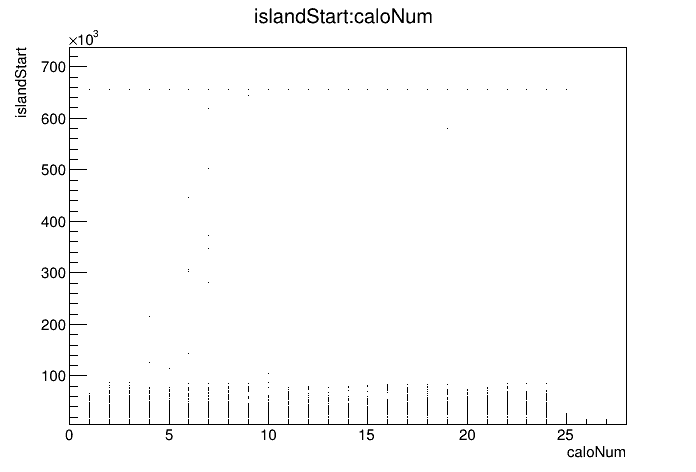

In [6]:
c = r.TCanvas()
t.Draw("islandStart:caloNum")
c.Draw()

In [7]:
print(t.GetEntries())

5475


***************************** 1 ******************************
Entry # 1
Entry # 2


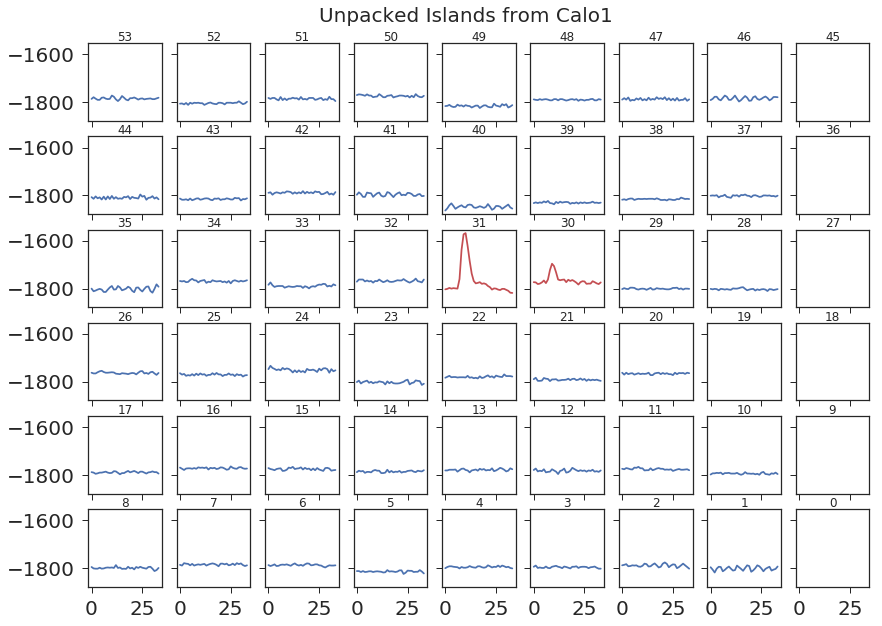

***************************** 2 ******************************
Entry # 49
Entry # 50
Entry # 51


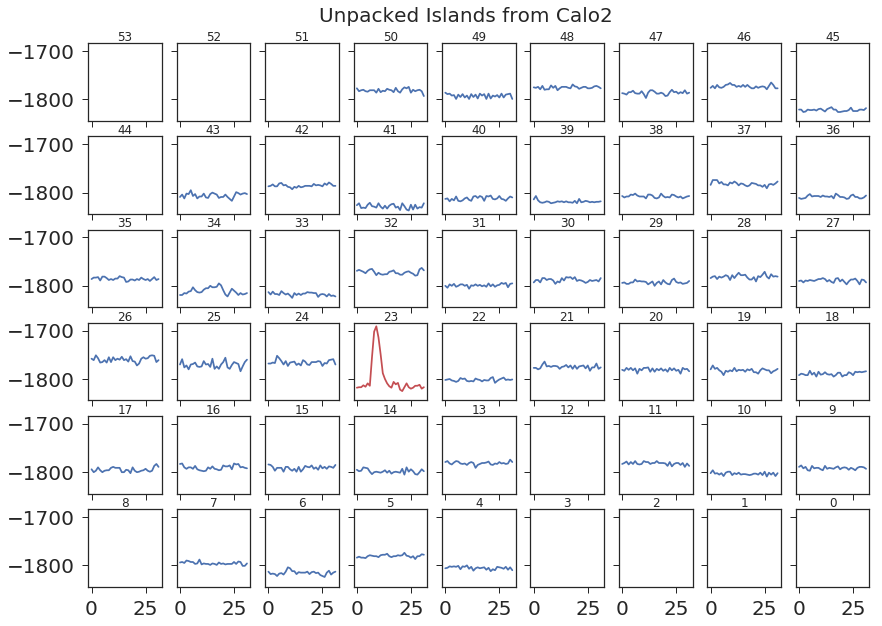

***************************** 3 ******************************
Entry # 105
Entry # 106
Entry # 107
Entry # 108
Entry # 109
Entry # 110
Entry # 111
Entry # 112


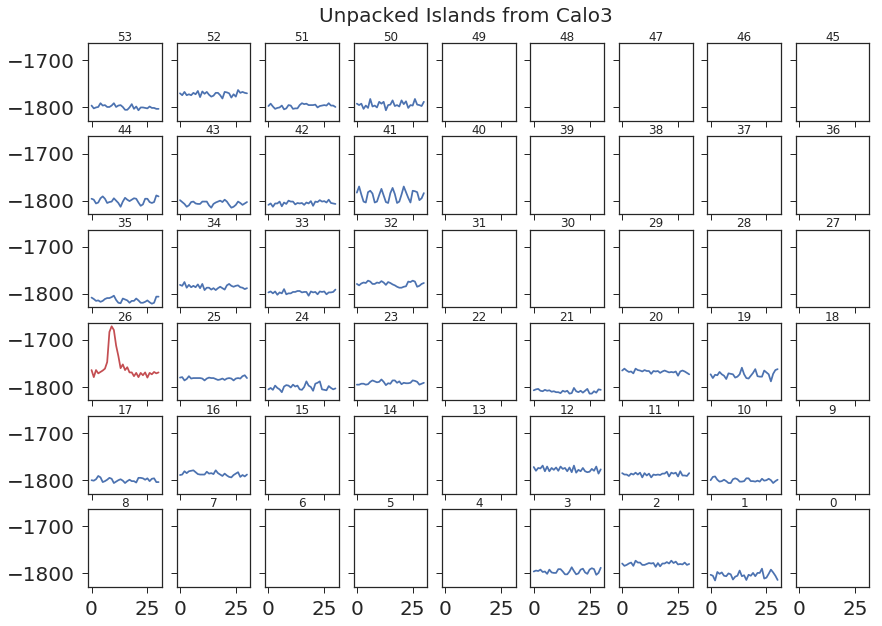

***************************** 4 ******************************
Entry # 155
Entry # 156
Entry # 157


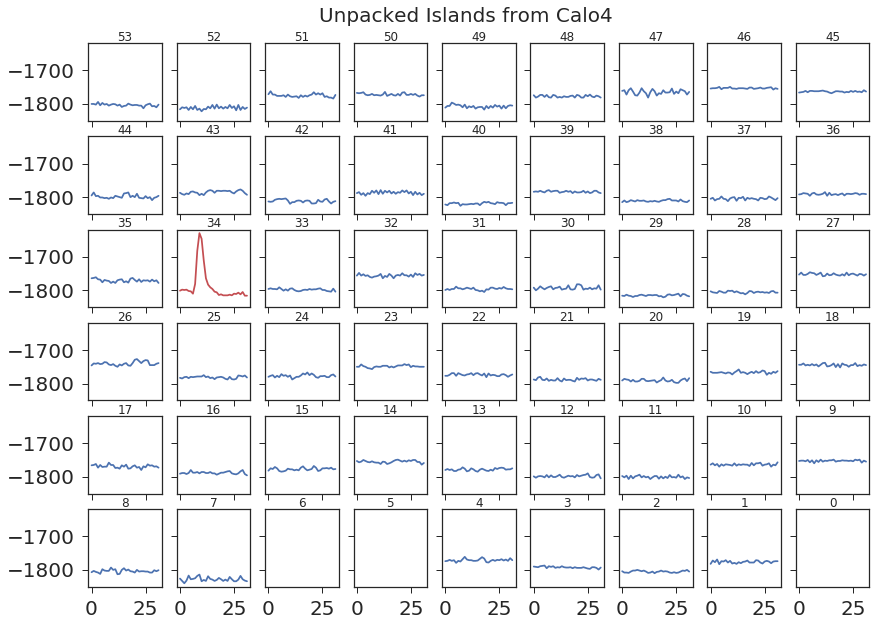

***************************** 5 ******************************
Entry # 213
Entry # 214


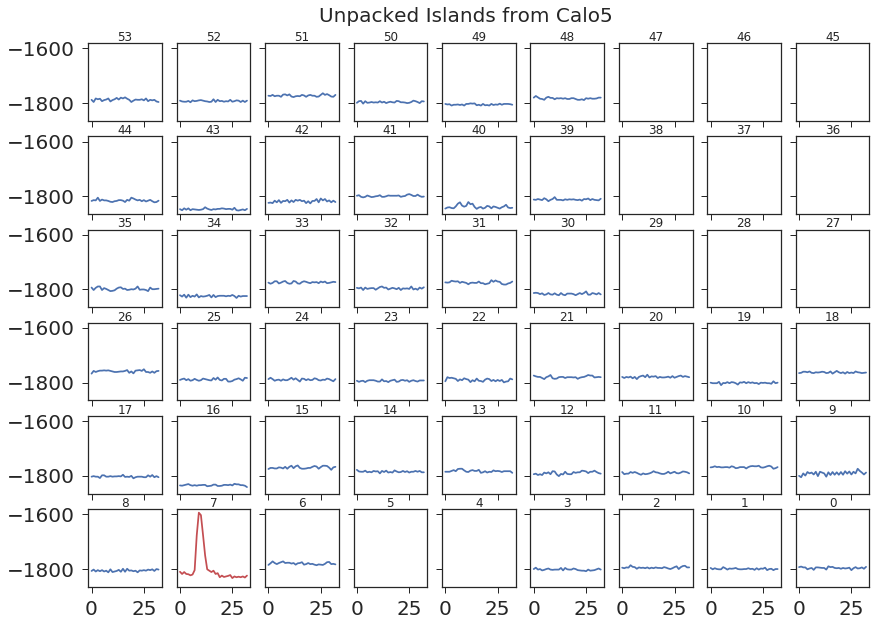

***************************** 6 ******************************
Entry # 276
Entry # 277
Entry # 278


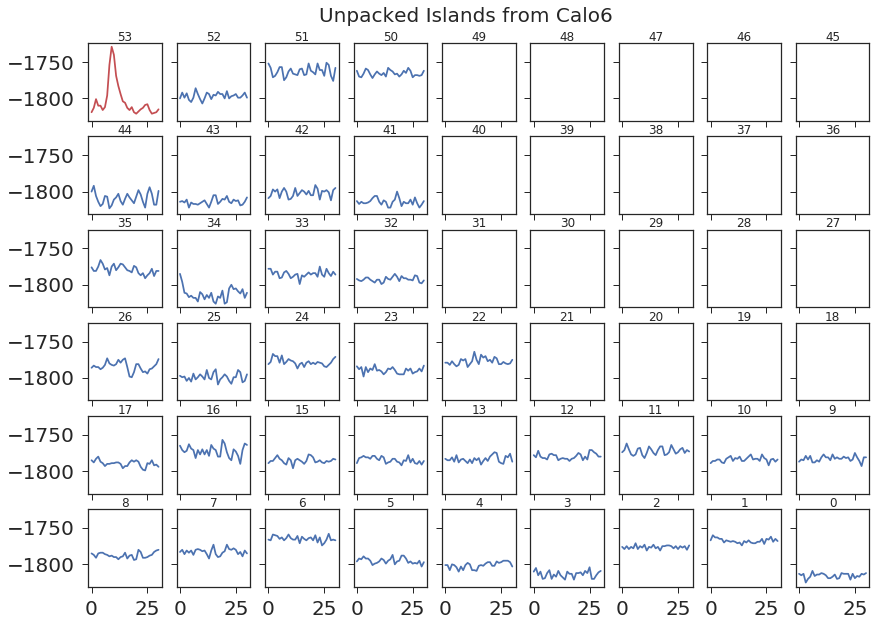

***************************** 7 ******************************
Entry # 344
Entry # 345
Entry # 346
Entry # 347
Entry # 348


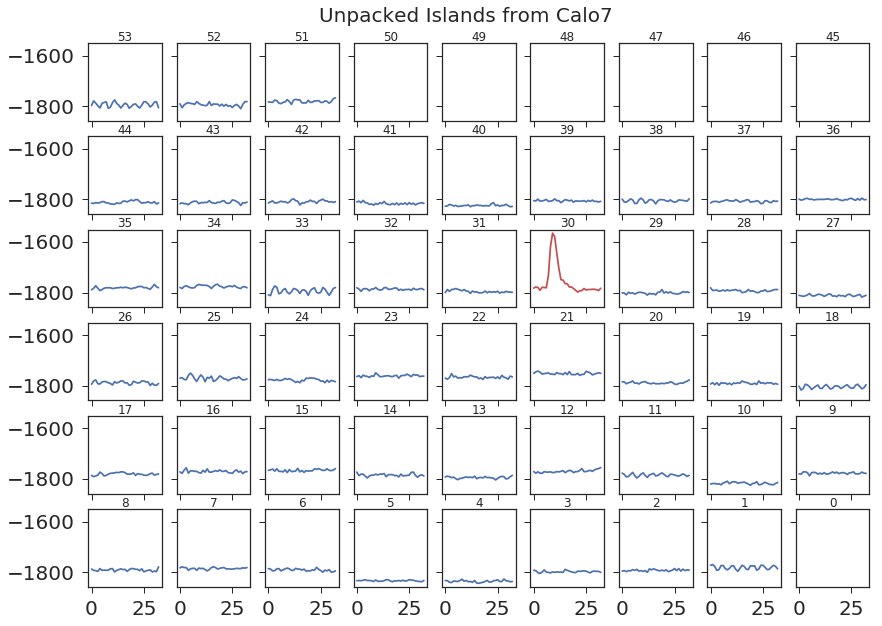

***************************** 8 ******************************
Entry # 397
Entry # 398
Entry # 399


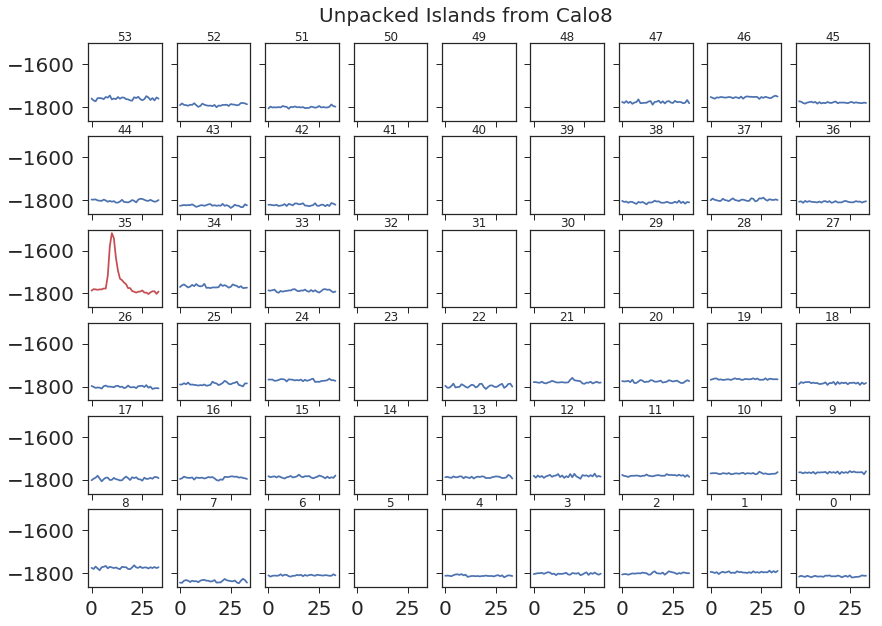

***************************** 9 ******************************
Entry # 450
Entry # 451
Entry # 452


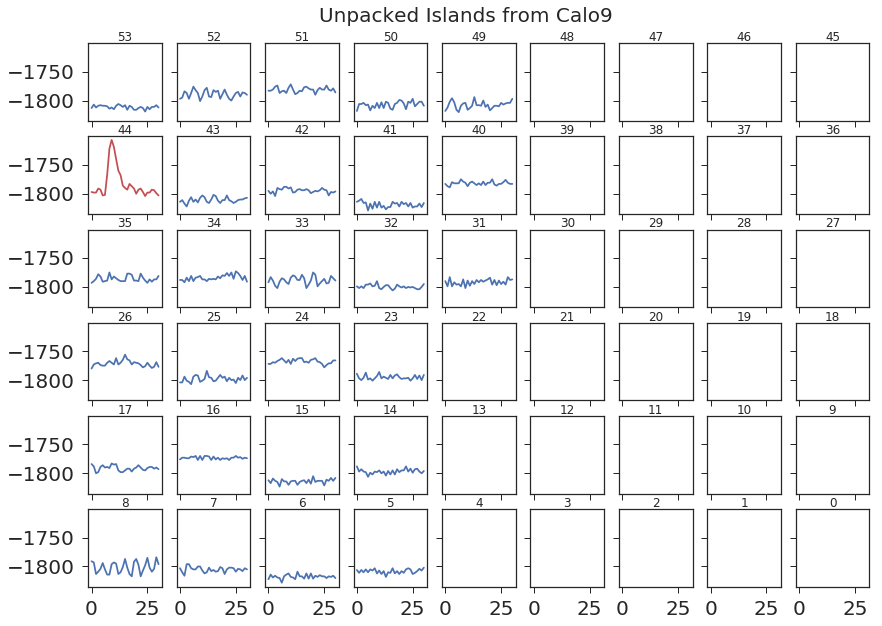

***************************** 10 ******************************
Entry # 494
Entry # 495
Entry # 496
Entry # 497


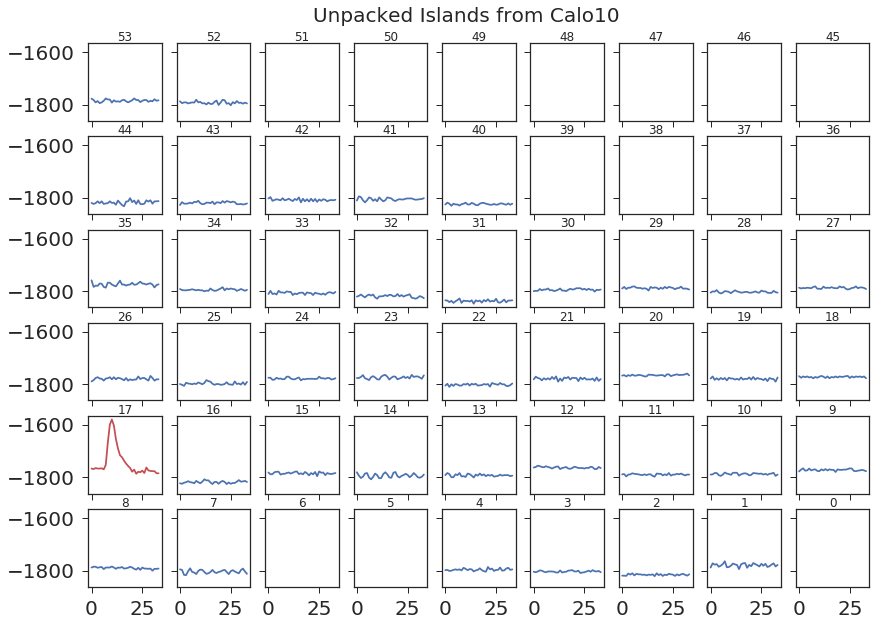

***************************** 11 ******************************
Entry # 537
Entry # 538
Entry # 539


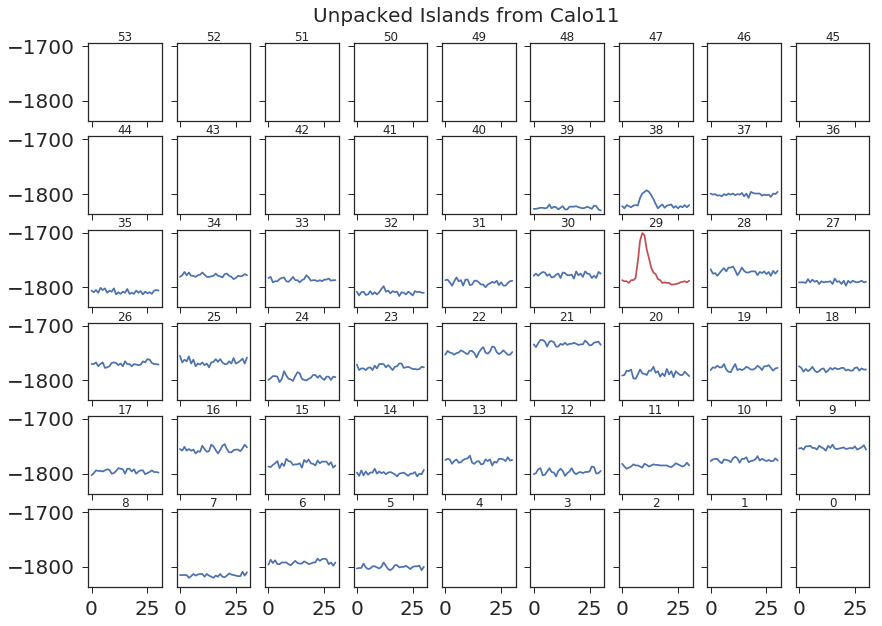

***************************** 12 ******************************
Entry # 578
Entry # 579
Entry # 580
Entry # 581
Entry # 582
Entry # 583
Entry # 584


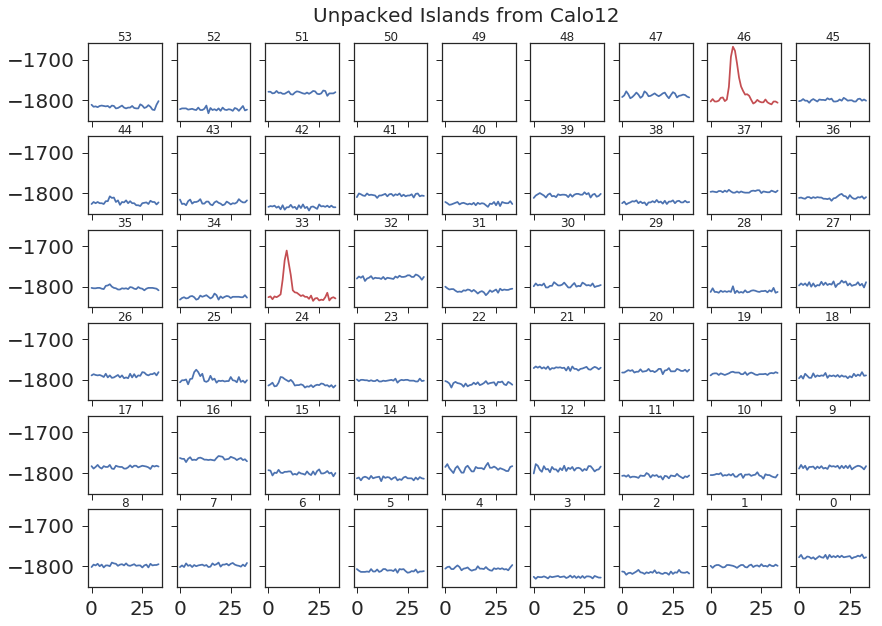

***************************** 13 ******************************
Entry # 623
Entry # 624
Entry # 625
Entry # 626
Entry # 627
Entry # 628
Entry # 629
Entry # 630
Entry # 631
Entry # 632


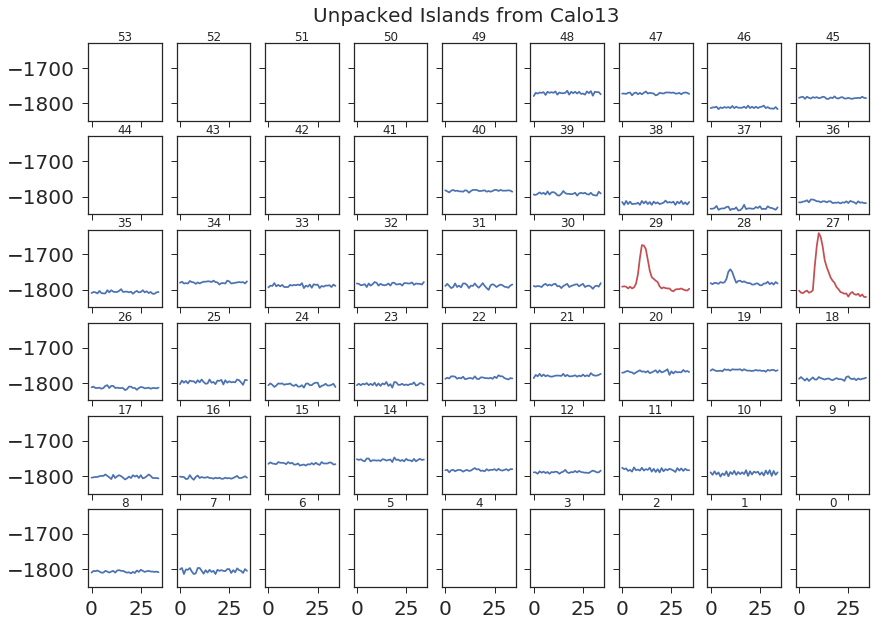

***************************** 14 ******************************
Entry # 667
Entry # 668
Entry # 669
Entry # 670


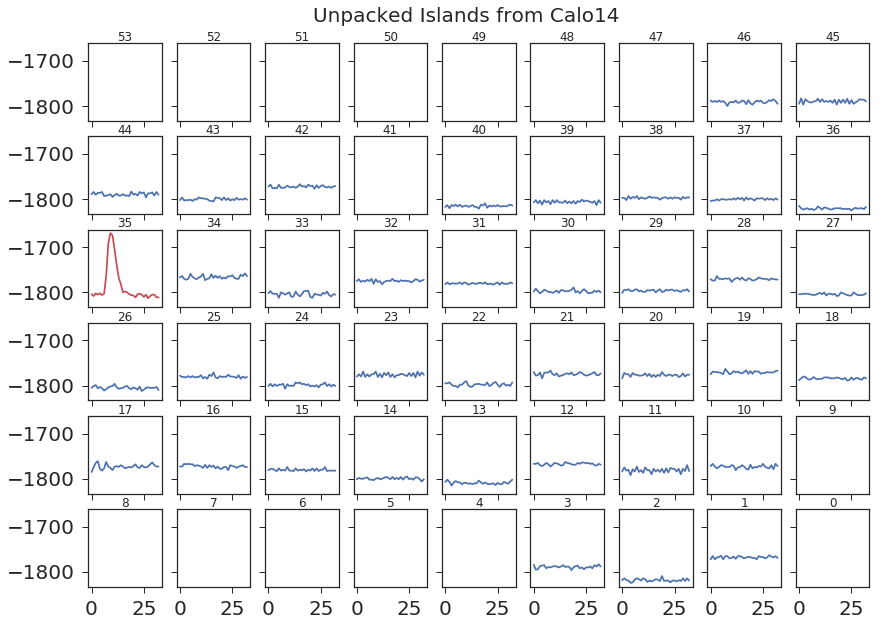

***************************** 15 ******************************
Entry # 708
Entry # 709
Entry # 710


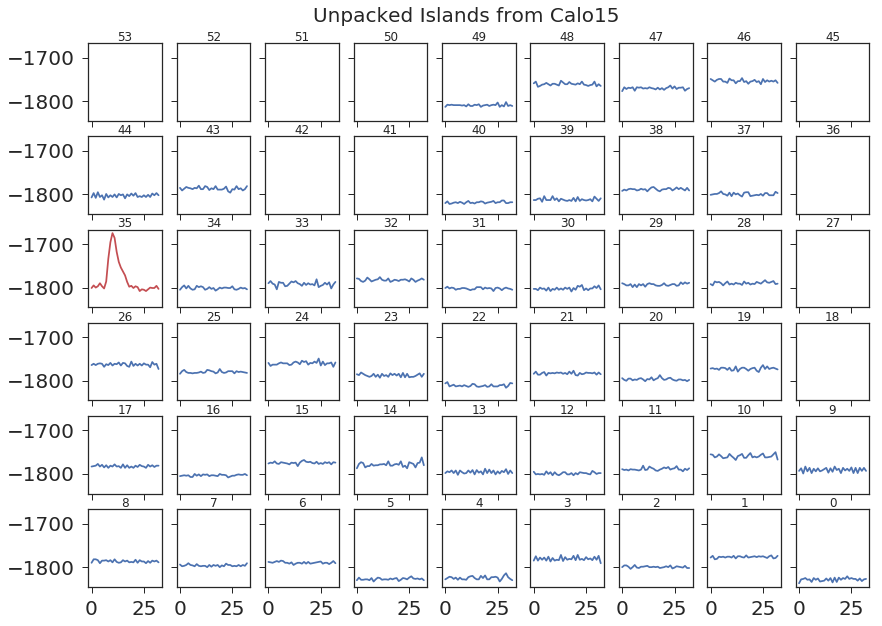

***************************** 16 ******************************
Entry # 747
Entry # 748
Entry # 749


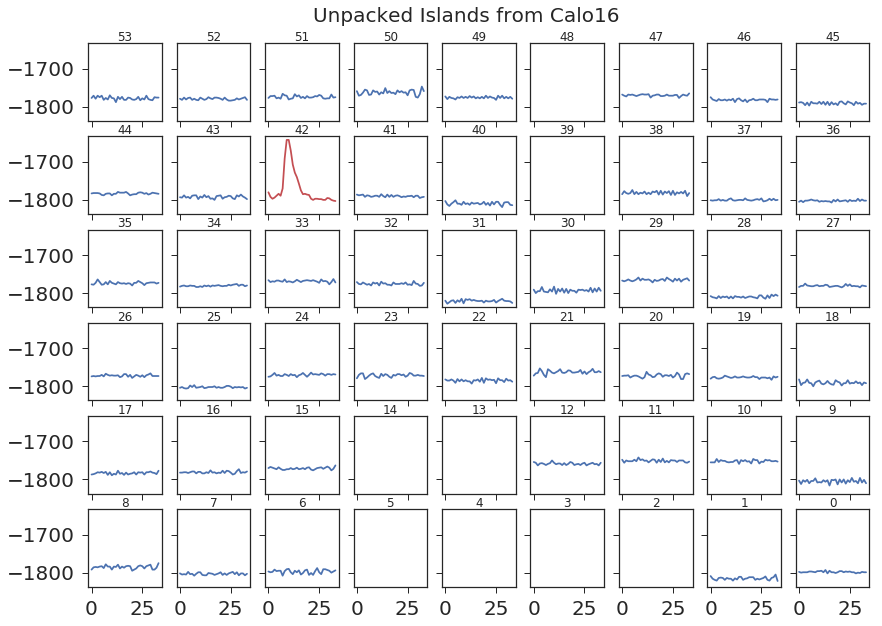

***************************** 17 ******************************
Entry # 791
Entry # 792
Entry # 793


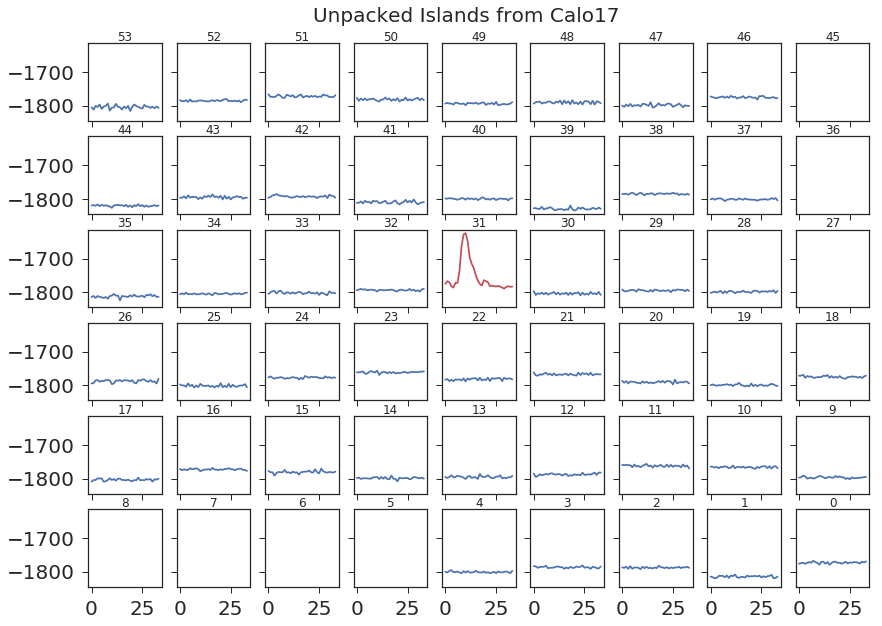

***************************** 18 ******************************
Entry # 841
Entry # 842
Entry # 843


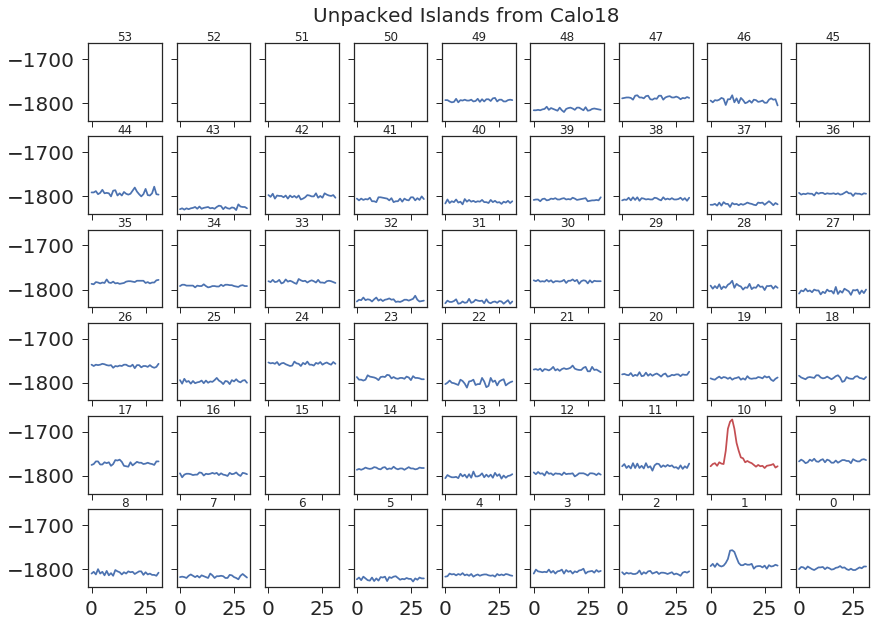

***************************** 19 ******************************
Entry # 889
Entry # 890
Entry # 891
Entry # 892
Entry # 893
Entry # 894
Entry # 895


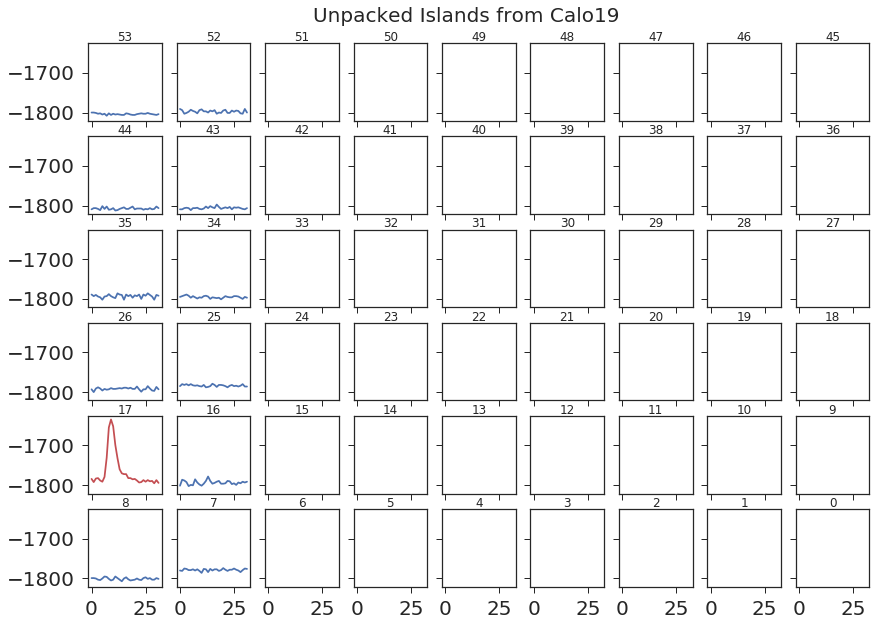

***************************** 20 ******************************
Entry # 934
Entry # 935


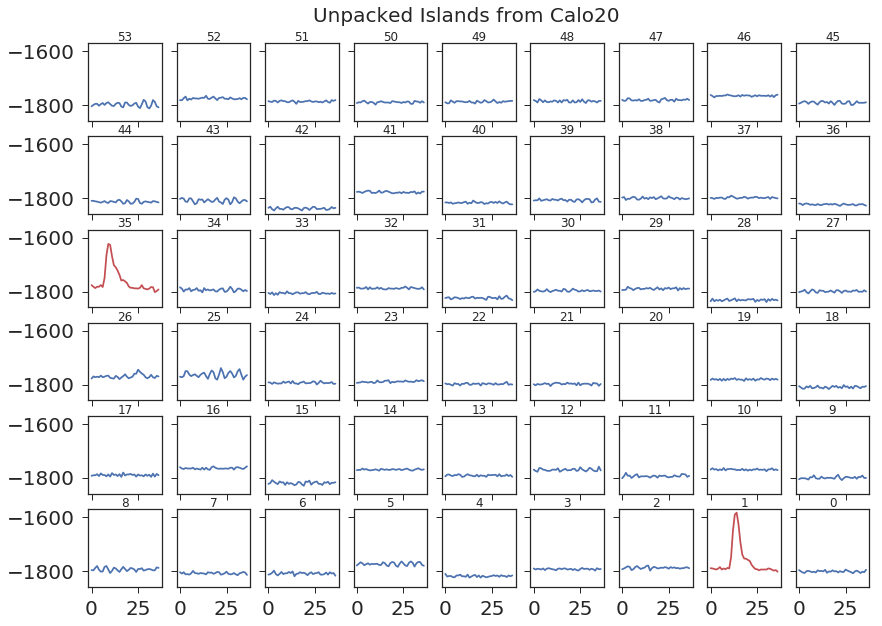

***************************** 21 ******************************
Entry # 980
Entry # 981
Entry # 982
Entry # 983
Entry # 984
Entry # 985
Entry # 986
Entry # 987


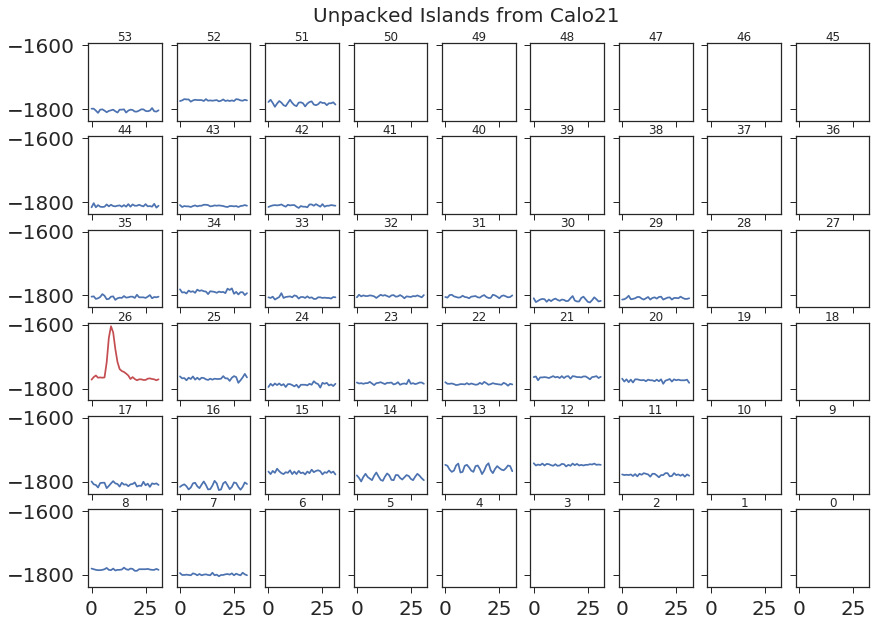

***************************** 22 ******************************
Entry # 1029
Entry # 1030
Entry # 1031


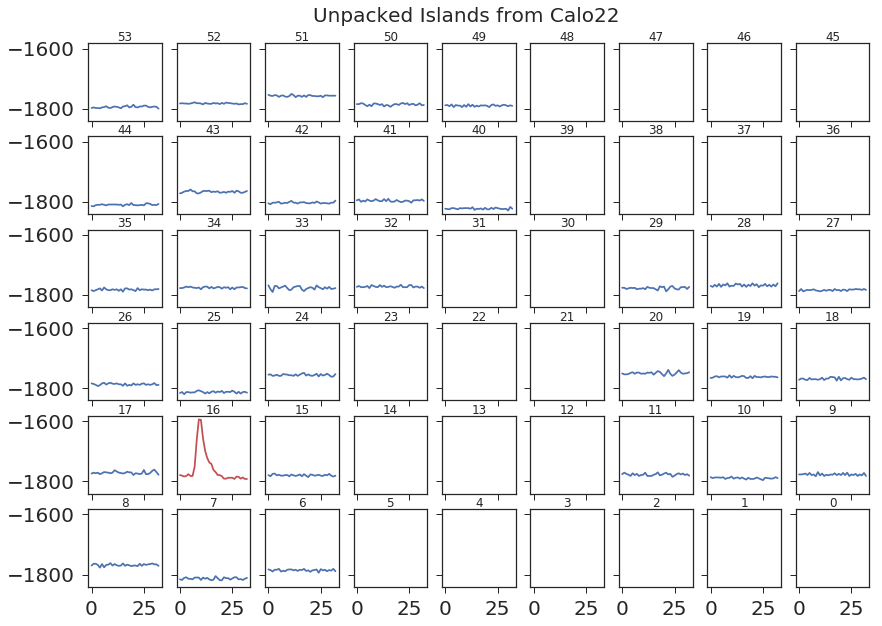

***************************** 23 ******************************
Entry # 1082
Entry # 1083
Entry # 1084


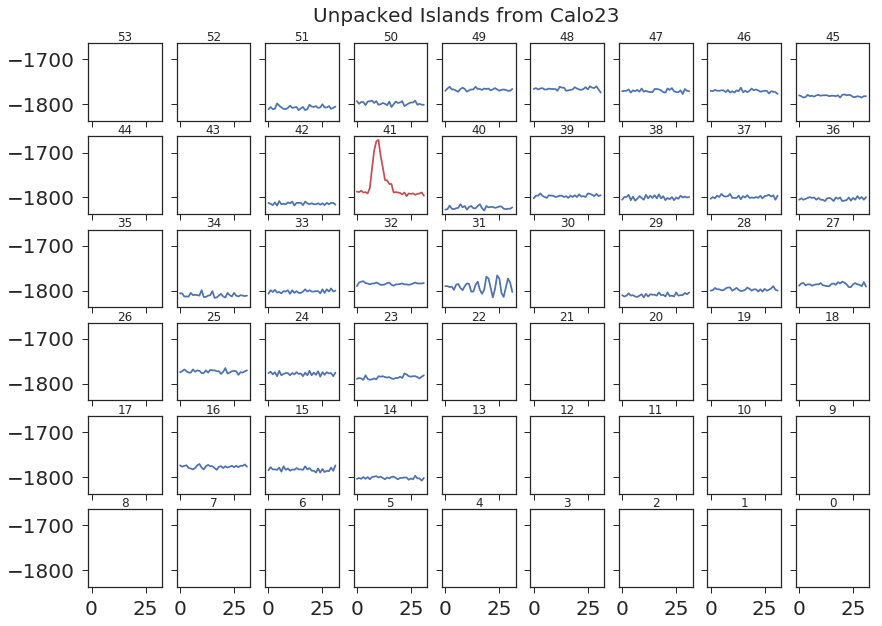

***************************** 24 ******************************
Entry # 1129
Entry # 1130
Entry # 1131


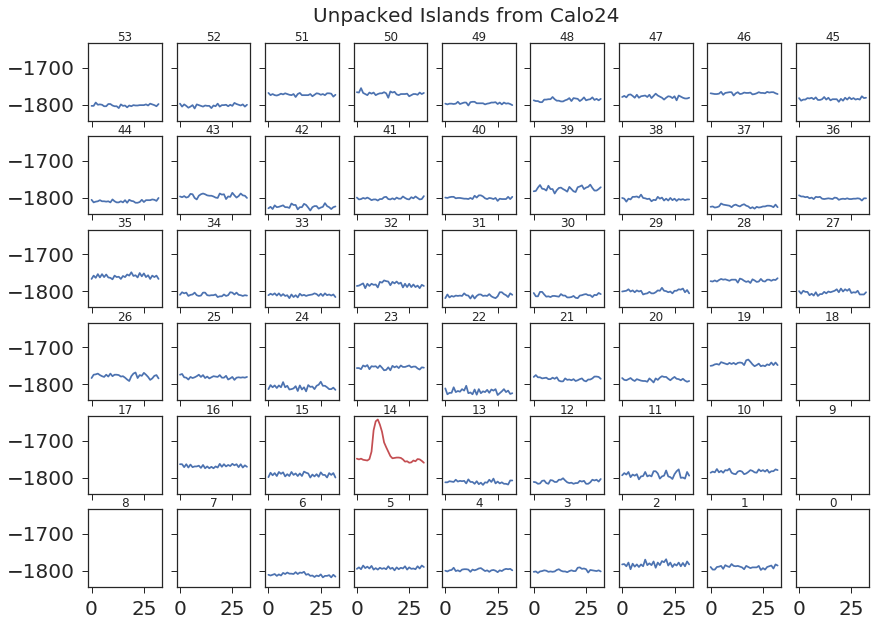

In [30]:
for caloNum in range(1,25):
    counter = 0
    print("*****************************", caloNum,"******************************")
    for i,entry in enumerate(t):
        if(int(t.caloNum) == caloNum):
            if i < 0:
                continue
            if counter > 0:
                break
            counter = counter + 1

            print("Entry #", i+1)
            plotVec = []
            allXtals = 0

            for crystal in range(0,54):
                branchString = "t.xtal"+str(crystal)
                entryVeci = []
                rootVec = eval(branchString)# t.xtal53
                length = rootVec.size()
    #            print("     Crystal",crystal,"has length [("+branchString+").size()]", length)
                for ding in range(length):
                    entryVeci.append( rootVec[ding] )
                if(length > 0):
                    allXtals += 1
                plotVec.append(entryVeci)
                
            if(allXtals == 54):
                counter -= 1
                continue
            fig, axarr = plt.subplots(6,9, sharey=True, sharex=True,figsize=(14, 10))


            plotVec.reverse()
            list1 = []
            list2 = []
            xtal = []
            list2xtal = []
            for crystal in range(54):
                list2.append(plotVec[crystal]) 
                list2xtal.append(crystal)
                if (crystal+1) % 9 == 0: #split into 9 column blocks
                    list1.append(list2)
                    list2 = []
                    list2xtal.reverse()
                    xtal.append(list2xtal)
                    list2xtal = []
            xtal.reverse()


            for ding in range(9):
                for j in range(6):
                    if(len(list1[j][ding]) < 1):
                        axarr[j,ding].plot(list1[j][ding],color='g') 
                    elif(np.abs( (list1[j][ding])[0] - np.max(list1[j][ding]) ) > 50):
                        axarr[j,ding].plot(list1[j][ding],color='r') 
                    else:
                        axarr[j,ding].plot(list1[j][ding],color='b') 
                    axarr[j,ding].set_title(str(xtal[j][ding]),y = 0.95)
#                    axarr[j,ding].set_yticklabels([])
#                    axarr[j,ding].set_xticklabels([])

            plt.suptitle("Unpacked Islands from Calo"+str(t.caloNum),y = 0.93, fontsize=20)
            #fig.tight_layout()

#            plt.savefig("./images/UnpackedIslands_calo"+str(t.caloNum).zfill(2)+"_run18433_subRun"+subRun_num+"_entry"+str(i)
#                        +".png",bbox_inches='tight')
            plt.show()

Entry # 27
4
run 23573 subrun 184 calo 1 island 0 fill 1


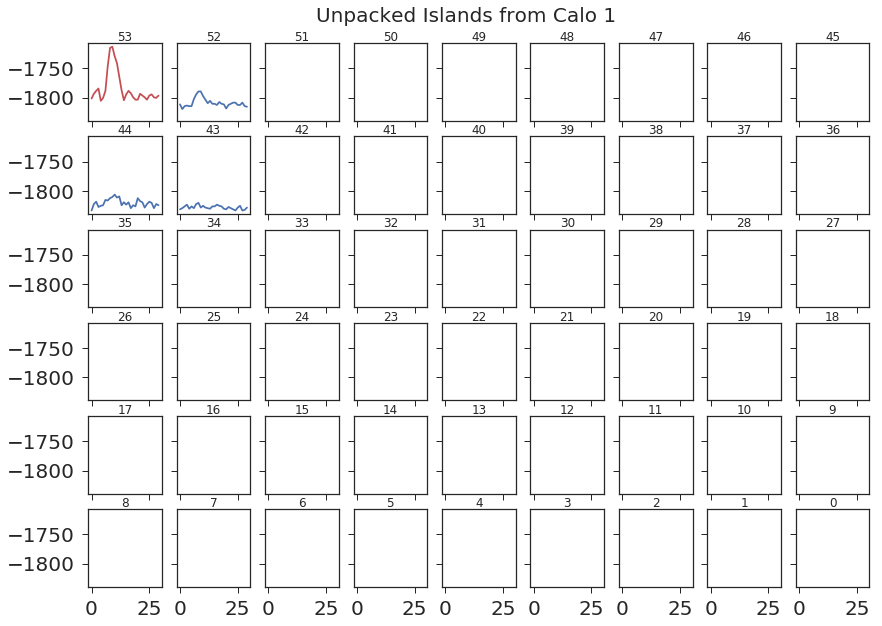

Entry # 1189
9
run 23573 subrun 184 calo 1 island 0 fill 3


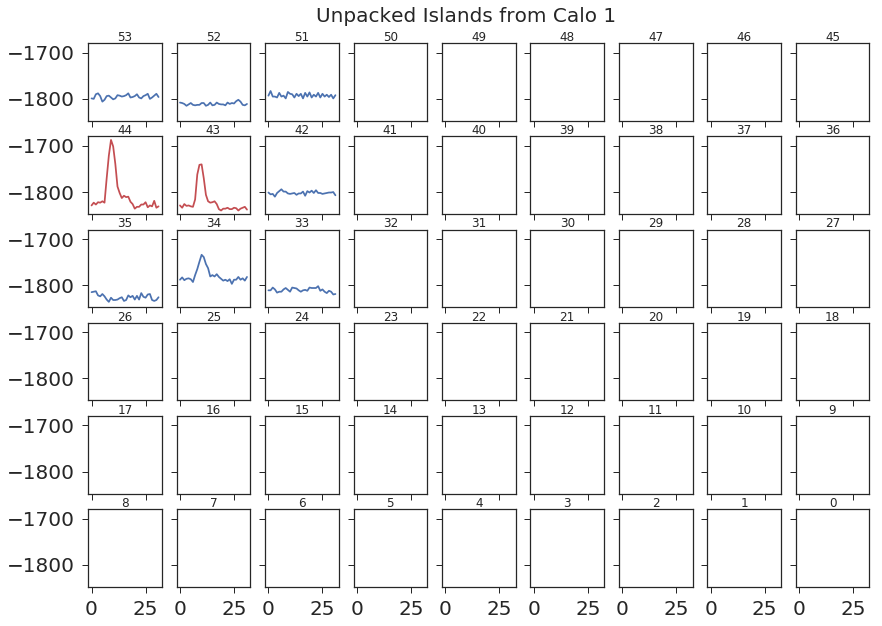

Entry # 2206
6
run 23573 subrun 184 calo 1 island 0 fill 5


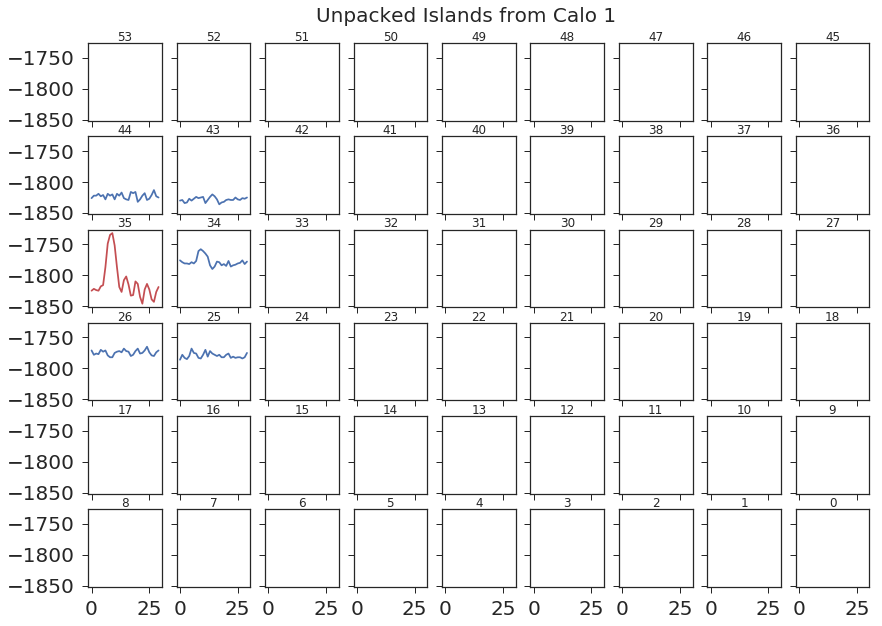

Entry # 3377
9
run 23573 subrun 184 calo 1 island 0 fill 7


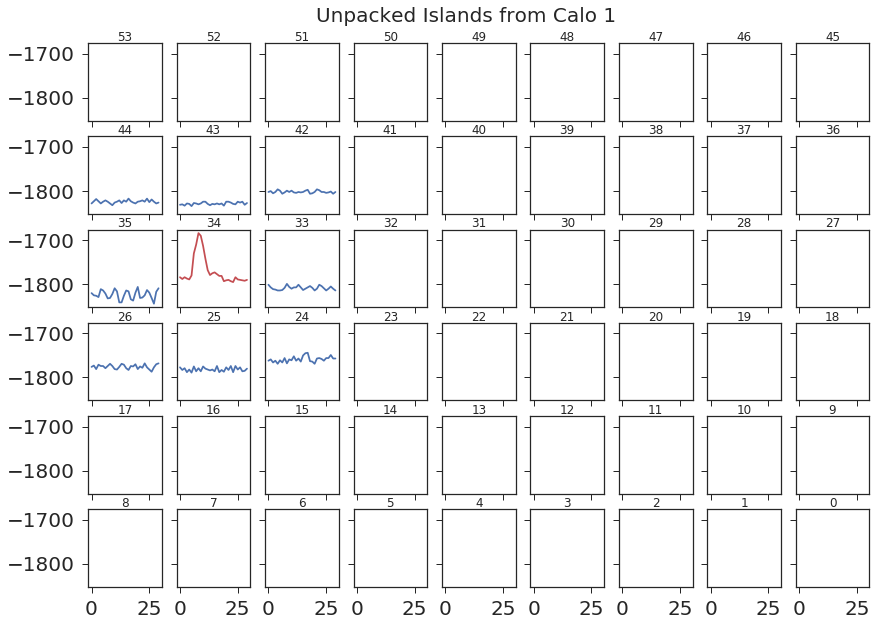

Entry # 4382
6
run 23573 subrun 184 calo 1 island 0 fill 9


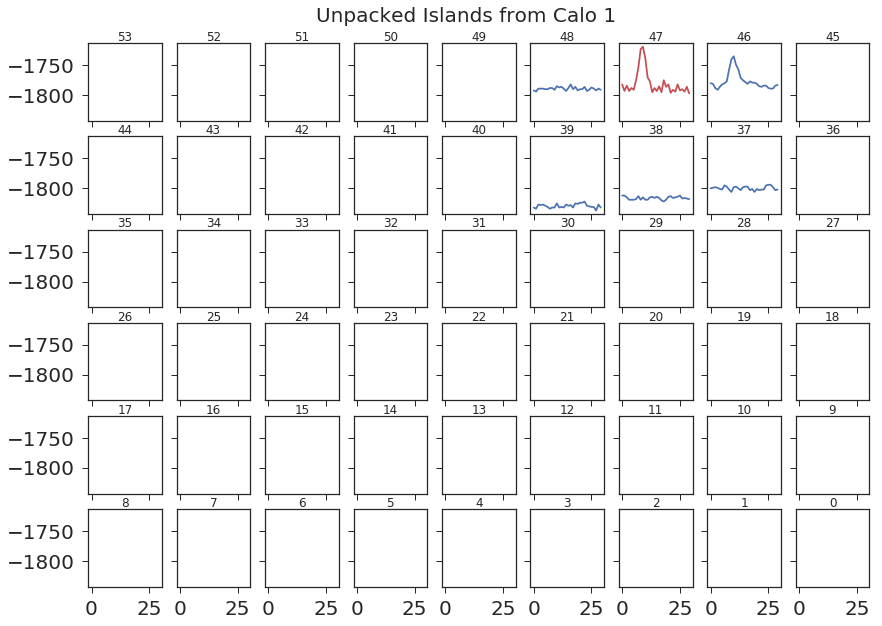

Entry # 5501
9
run 23573 subrun 184 calo 1 island 0 fill 11


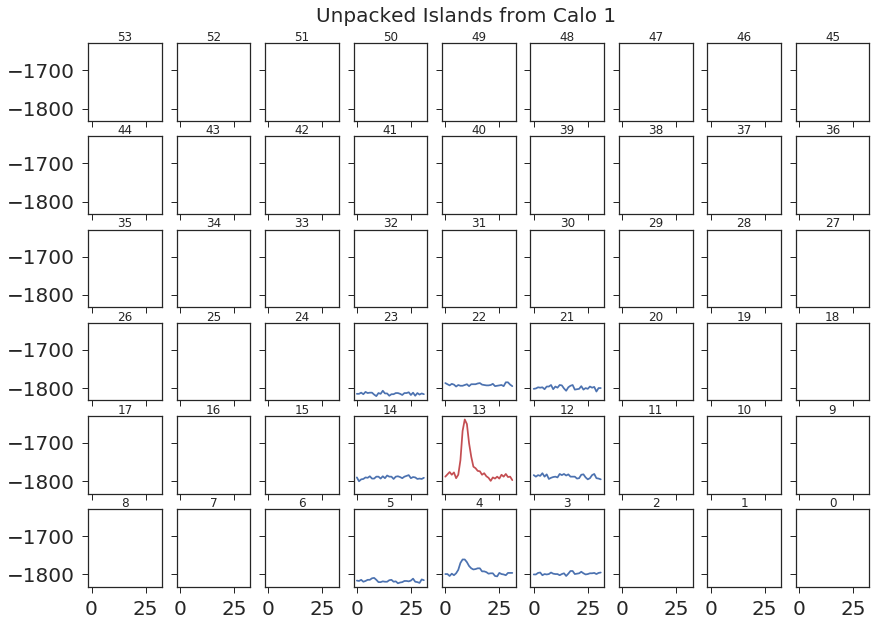

Entry # 6352
6
run 23573 subrun 184 calo 1 island 0 fill 13


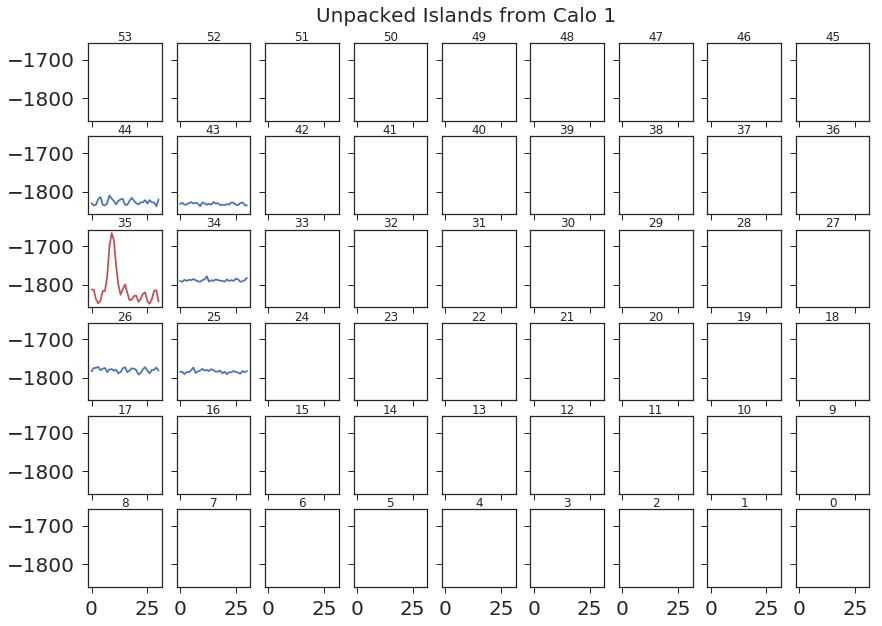

Entry # 7549
9
run 23573 subrun 184 calo 1 island 0 fill 15


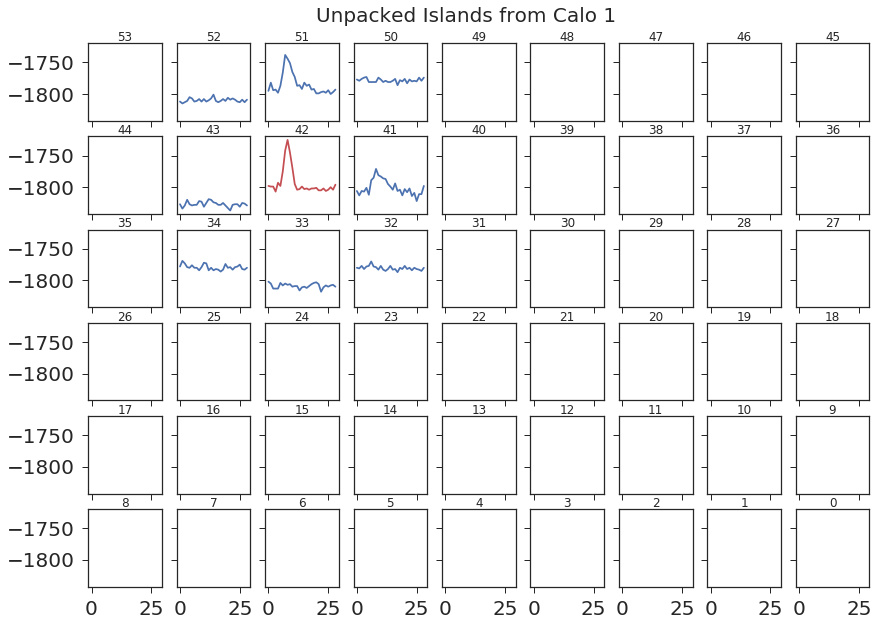

Entry # 8726
6
run 23573 subrun 184 calo 1 island 0 fill 17


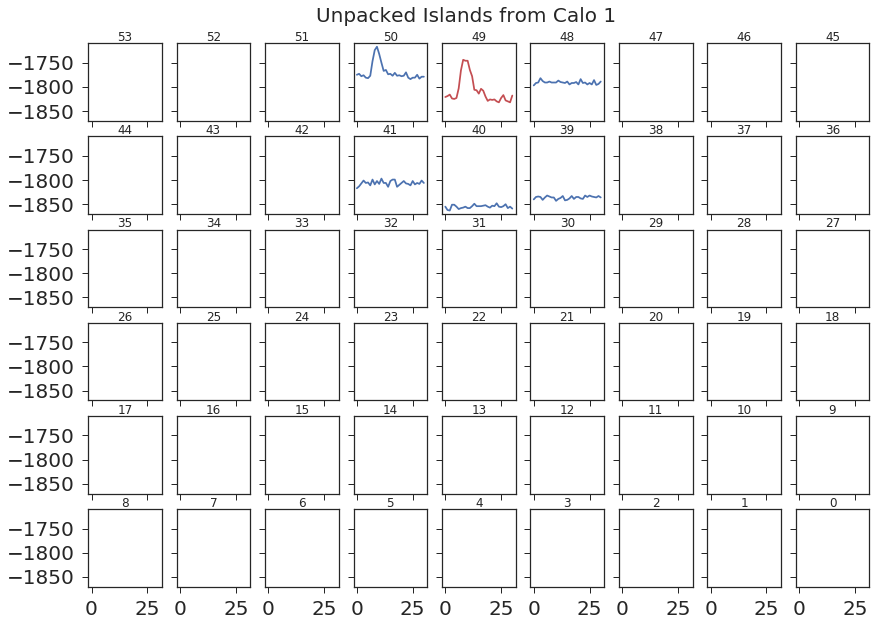

Entry # 9871
6
run 23573 subrun 184 calo 1 island 0 fill 19


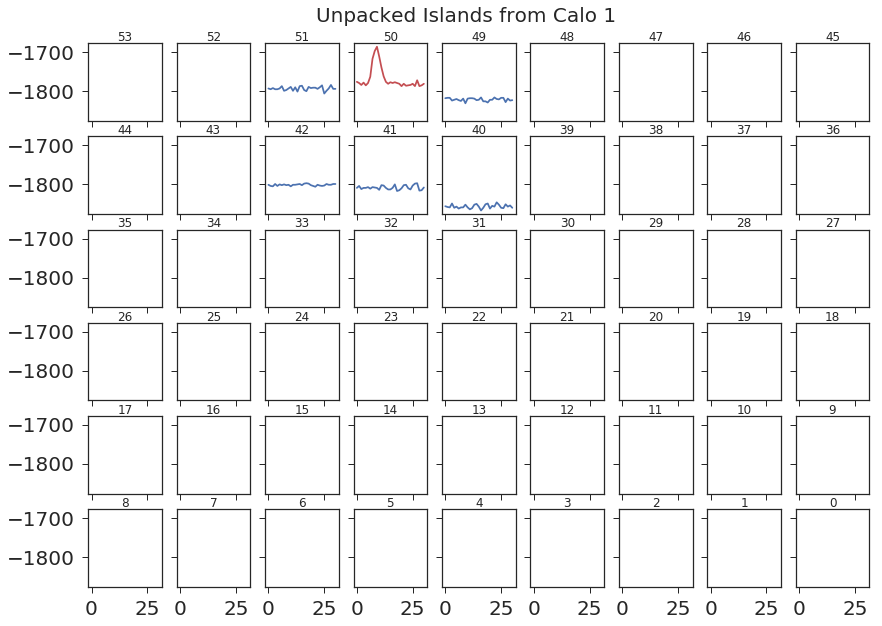

Entry # 10933
9
run 23573 subrun 184 calo 1 island 0 fill 21


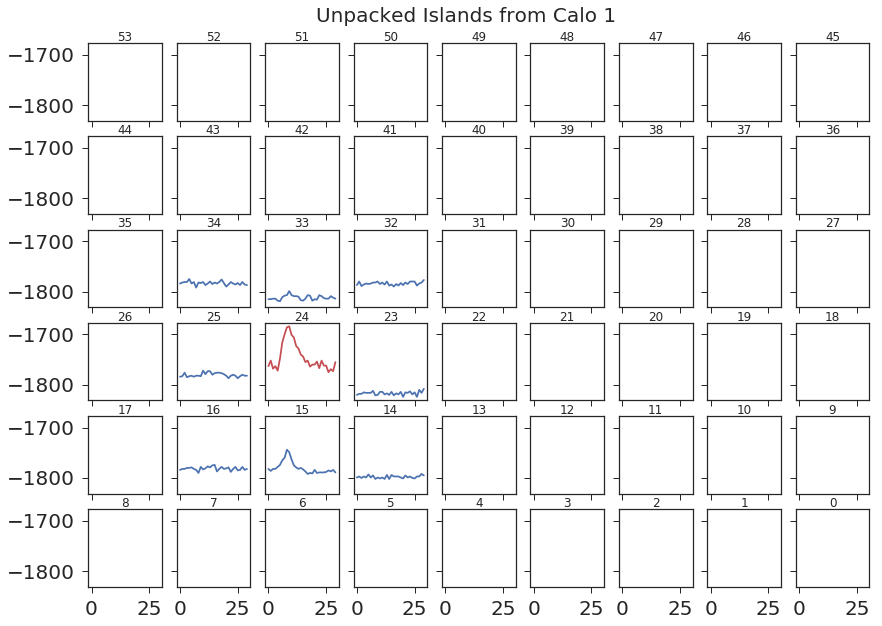

In [37]:
counter = 0
caloNum = 1
for i,entry in enumerate(t):
    if(int(t.caloNum) == caloNum and int(t.islandNum) == 0 ):
        if i < 0:
            continue
        if counter > 10:
            break
        counter = counter + 1

        
        print("Entry #", i+1)
        plotVec = []
        allXtals = 0
        for crystal in range(0,54):
            branchString = "t.xtal"+str(crystal)
            entryVeci = []
            rootVec = eval(branchString)# t.xtal53
            length = rootVec.size()
            if(length > 0):
                allXtals += 1
#            print("     Crystal",crystal,"has length [("+branchString+").size()]", length)
            for ding in range(length):
                entryVeci.append( rootVec[ding] )
            plotVec.append(entryVeci)
            
        print(allXtals)
        
        if(allXtals == 54):
            counter -= 1
            continue
            
        fig, axarr = plt.subplots(6,9, sharey=True, sharex=True,figsize=(14, 10))

        plotVec.reverse()
        list1 = []
        list2 = []
        xtal = []
        list2xtal = []
        for crystal in range(54):
            list2.append(plotVec[crystal]) 
            list2xtal.append(crystal)
            if (crystal+1) % 9 == 0: #split into 9 column blocks
                list1.append(list2)
                list2 = []
                list2xtal.reverse()
                xtal.append(list2xtal)
                list2xtal = []
        xtal.reverse()


        for ding in range(9):
            for j in range(6):
                if(len(list1[j][ding]) < 1):
                    axarr[j,ding].plot(list1[j][ding],color='g') 
                elif(np.abs( (list1[j][ding])[0] - np.max(list1[j][ding]) ) > 60):
                    axarr[j,ding].plot(list1[j][ding],color='r') 
                else:
                    axarr[j,ding].plot(list1[j][ding],color='b') 
                axarr[j,ding].set_title(str(xtal[j][ding]),y = 0.95)
#                    axarr[j,ding].set_yticklabels([])
#                    axarr[j,ding].set_xticklabels([])

        plt.suptitle("Unpacked Islands from Calo "+str(t.caloNum),y = 0.93, fontsize=20)
        print("run", t.runNum, "subrun", t.subRunNum, "calo", t.caloNum, "island", t.islandNum, "fill", t.fillNum)
        #fig.tight_layout()

#            plt.savefig("./images/UnpackedIslands_calo"+str(t.caloNum).zfill(2)+"_run18433_subRun"+subRun_num+"_entry"+str(i)
#                        +".png",bbox_inches='tight')
        plt.show()

54258


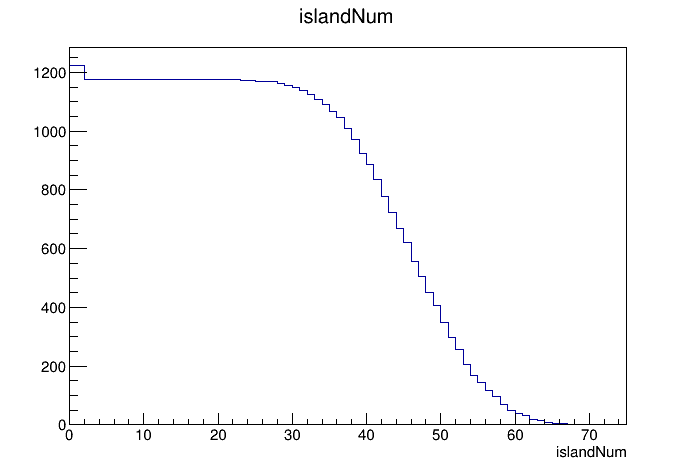

In [38]:
c = r.TCanvas()
ding = t.Draw("islandNum","")
print(ding)
c.Draw()